In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [4]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [5]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [6]:
euro_option_bs(119.40, 120, 1/12, 0.0154, 0.40, 'call')

5.287301334533069

In [7]:
euro_option_bs(119.40, 120, 1/12, 0.0154, 0.40, 'put')

5.733400108941716

In [8]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

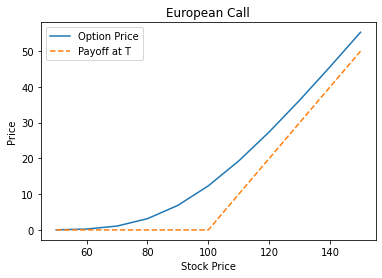

In [9]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [10]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [11]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [13]:
euro_option_bsm(119.70, 120, 1/12, 0.0154, 0.0067, 0.40, 'call')

5.407046511017512

In [20]:
cpd = np.zeros((len(T),1))

In [21]:
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

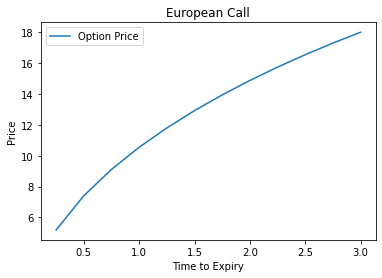

In [22]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

In [25]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-04-09')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210409C00060000,2021-03-09 18:33:54,60.0,61.80,59.90,60.20,0.00,0.000000,2.0,3,1.375980,True,REGULAR,USD
1,AAPL210409C00065000,2021-03-03 20:52:37,65.0,57.50,54.70,54.90,0.00,0.000000,NaN,1,1.090825,True,REGULAR,USD
2,AAPL210409C00070000,2021-03-03 20:52:37,70.0,52.45,49.75,50.00,0.00,0.000000,NaN,20,1.017583,True,REGULAR,USD
3,AAPL210409C00075000,2021-03-09 14:53:51,75.0,44.72,44.80,45.00,0.00,0.000000,1.0,2,0.915040,True,REGULAR,USD
4,AAPL210409C00090000,2021-03-11 18:24:31,90.0,32.06,29.80,30.00,0.00,0.000000,2.0,10,0.601078,True,REGULAR,USD
5,AAPL210409C00095000,2021-03-11 14:36:52,95.0,28.26,25.00,25.25,0.00,0.000000,2.0,4,0.565434,True,REGULAR,USD
6,AAPL210409C00100000,2021-03-12 14:30:01,100.0,20.77,20.25,20.40,-1.60,-7.152437,3.0,91,0.502446,True,REGULAR,USD
7,AAPL210409C00105000,2021-03-11 18:04:29,105.0,17.79,15.55,15.70,0.00,0.000000,1.0,47,0.451177,True,REGULAR,USD
8,AAPL210409C00108000,2021-03-10 20:21:47,108.0,15.00,12.85,13.00,0.00,0.000000,1.0,17,0.418219,True,REGULAR,USD
9,AAPL210409C00109000,2021-03-08 16:35:17,109.0,14.00,12.05,12.20,0.00,0.000000,1.0,8,0.416021,True,REGULAR,USD


In [26]:
data = yf.download("AAPL", start="2020-03-11", end="2021-03-12")

[*********************100%***********************]  1 of 1 completed


In [27]:
data['Adj Close']

Date
2020-03-11     68.327858
2020-03-12     61.580158
2020-03-13     68.957970
2020-03-16     60.086731
2020-03-17     62.728752
                 ...    
2021-03-04    120.129997
2021-03-05    121.419998
2021-03-08    116.360001
2021-03-09    121.089996
2021-03-10    119.980003
Name: Adj Close, Length: 252, dtype: float64

In [29]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/12
r = 0.0154
q = 0.0067
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.44538116318463083

In [30]:
K

0      60.0
1      65.0
2      70.0
3      75.0
4      90.0
5      95.0
6     100.0
7     105.0
8     108.0
9     109.0
10    110.0
11    111.0
12    112.0
13    113.0
14    114.0
15    115.0
16    116.0
17    117.0
18    118.0
19    119.0
20    120.0
21    121.0
22    122.0
23    123.0
24    124.0
25    125.0
26    126.0
27    127.0
28    128.0
29    129.0
30    130.0
31    131.0
32    132.0
33    133.0
34    134.0
35    135.0
36    136.0
37    137.0
38    138.0
39    139.0
40    140.0
41    145.0
42    150.0
43    155.0
44    160.0
45    165.0
46    170.0
47    175.0
Name: strike, dtype: float64

In [31]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [32]:
AAPL_bsm_call

array([[5.99899839e+01],
       [5.49963984e+01],
       [5.00028434e+01],
       [4.50095936e+01],
       [3.00862236e+01],
       [2.52200693e+01],
       [2.05315461e+01],
       [1.61524032e+01],
       [1.37345523e+01],
       [1.29702259e+01],
       [1.22283334e+01],
       [1.15097246e+01],
       [1.08151537e+01],
       [1.01452711e+01],
       [9.50061782e+00],
       [8.88162027e+00],
       [8.28858793e+00],
       [7.72171190e+00],
       [7.18106545e+00],
       [6.66660603e+00],
       [6.17817869e+00],
       [5.71552092e+00],
       [5.27826854e+00],
       [4.86596263e+00],
       [4.47805731e+00],
       [4.11392808e+00],
       [3.77288066e+00],
       [3.45416010e+00],
       [3.15696004e+00],
       [2.88043187e+00],
       [2.62369376e+00],
       [2.38583941e+00],
       [2.16594633e+00],
       [1.96308374e+00],
       [1.77631978e+00],
       [1.60472825e+00],
       [1.44739461e+00],
       [1.30342133e+00],
       [1.17193263e+00],
       [1.05207844e+00],


In [33]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL210409C00060000,2021-03-09 18:33:54,60.0,61.80,59.90,60.20,0.00,0.000000,2.0,3,1.375980,True,REGULAR,USD,59.989984
1,AAPL210409C00065000,2021-03-03 20:52:37,65.0,57.50,54.70,54.90,0.00,0.000000,NaN,1,1.090825,True,REGULAR,USD,54.996398
2,AAPL210409C00070000,2021-03-03 20:52:37,70.0,52.45,49.75,50.00,0.00,0.000000,NaN,20,1.017583,True,REGULAR,USD,50.002843
3,AAPL210409C00075000,2021-03-09 14:53:51,75.0,44.72,44.80,45.00,0.00,0.000000,1.0,2,0.915040,True,REGULAR,USD,45.009594
4,AAPL210409C00090000,2021-03-11 18:24:31,90.0,32.06,29.80,30.00,0.00,0.000000,2.0,10,0.601078,True,REGULAR,USD,30.086224
5,AAPL210409C00095000,2021-03-11 14:36:52,95.0,28.26,25.00,25.25,0.00,0.000000,2.0,4,0.565434,True,REGULAR,USD,25.220069
6,AAPL210409C00100000,2021-03-12 14:30:01,100.0,20.77,20.25,20.40,-1.60,-7.152437,3.0,91,0.502446,True,REGULAR,USD,20.531546
7,AAPL210409C00105000,2021-03-11 18:04:29,105.0,17.79,15.55,15.70,0.00,0.000000,1.0,47,0.451177,True,REGULAR,USD,16.152403
8,AAPL210409C00108000,2021-03-10 20:21:47,108.0,15.00,12.85,13.00,0.00,0.000000,1.0,17,0.418219,True,REGULAR,USD,13.734552
9,AAPL210409C00109000,2021-03-08 16:35:17,109.0,14.00,12.05,12.20,0.00,0.000000,1.0,8,0.416021,True,REGULAR,USD,12.970226


In [34]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error']

0       3.017197
1       4.552301
2       4.894035
3      -0.643404
4       6.560399
5      12.053618
6       1.161402
7      10.138410
8       9.213607
9       7.939523
10      6.964699
11      7.039920
12      7.071988
13     10.494829
14      3.151186
15    -17.920382
16    -20.372444
17     -2.223754
18    -20.624592
19    -23.499304
20    -25.544400
21    -31.939712
22    -32.743096
23    -34.237062
24    -38.812753
25    -40.689289
26    -43.279414
27    -44.414852
28    -50.268614
29    -50.007497
30    -50.451534
31    -55.990332
32    -56.139264
33    -59.247790
34    -60.029719
35    -59.494699
36    -62.000687
37    -61.639419
38    -60.748597
39    -61.980021
40    -57.583887
41    -56.900084
42    -31.383829
43     -9.117993
44     39.297184
45    128.669568
46    423.133465
47    782.360779
Name: estimate_error, dtype: float64

In [35]:
opt.calls['estimate_error'].describe()

count     48.000000
mean       5.162202
std      135.949587
min      -62.000687
25%      -50.314344
50%      -22.061948
75%        6.661474
max      782.360779
Name: estimate_error, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

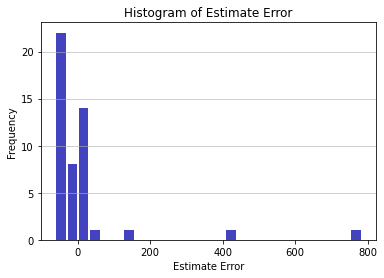

In [38]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'], bins='auto', color='#0504aa',alpha=0.75, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

Text(0.5, 1.0, 'Histogram of Estimate Error')

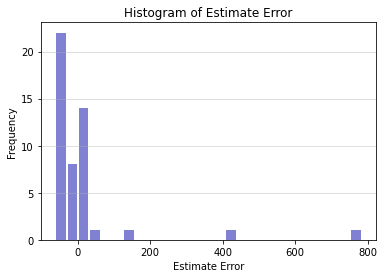

In [39]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'], bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)

plt.grid(axis='y', alpha=0.5)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

In [40]:
pip install mibian

  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4040 sha256=3ea38ec72ababd5a18694751903cb0e52a0ecee7fed19b669ff2f33bcb771d37
  Stored in directory: /Users/milvaniasantos/Library/Caches/pip/wheels/ac/d2/08/29d18978cfc7a7027fef186a04a809f81a424b421c6dbae25c
Successfully built mibian
Note: you may need to restart the kernel to use updated packages.


In [41]:
import mibian as mb

In [44]:
option_120 = mb.BS([S, 120, r*100, 30], volatility = vol*100)

In [47]:
option_120.callPrice

6.170362218295907

In [50]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 30], volatility = vol*100).callPrice

In [51]:
AAPL_mb_bsm_call

array([[6.00008447e+01],
       [5.50071711e+01],
       [5.00135241e+01],
       [4.50201509e+01],
       [3.00935510e+01],
       [2.52229729e+01],
       [2.05271514e+01],
       [1.61383775e+01],
       [1.37143481e+01],
       [1.29480098e+01],
       [1.22041631e+01],
       [1.14836777e+01],
       [1.07873263e+01],
       [1.01157771e+01],
       [9.46958684e+00],
       [8.84919616e+00],
       [8.25492643e+00],
       [7.68697850e+00],
       [7.14543296e+00],
       [6.63025218e+00],
       [6.14128373e+00],
       [5.67826522e+00],
       [5.24083035e+00],
       [4.82851600e+00],
       [4.44077008e+00],
       [4.07696020e+00],
       [3.73638267e+00],
       [3.41827188e+00],
       [3.12180978e+00],
       [2.84613530e+00],
       [2.59035365e+00],
       [2.35354524e+00],
       [2.13477425e+00],
       [1.93309667e+00],
       [1.74756775e+00],
       [1.57724883e+00],
       [1.42121352e+00],
       [1.27855315e+00],
       [1.14838157e+00],
       [1.02983925e+00],


In [52]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL210409C00060000,2021-03-09 18:33:54,60.0,61.80,59.90,60.20,0.00,0.000000,2.0,3,1.375980,True,REGULAR,USD,59.989984,3.017197,60.000845
1,AAPL210409C00065000,2021-03-03 20:52:37,65.0,57.50,54.70,54.90,0.00,0.000000,NaN,1,1.090825,True,REGULAR,USD,54.996398,4.552301,55.007171
2,AAPL210409C00070000,2021-03-03 20:52:37,70.0,52.45,49.75,50.00,0.00,0.000000,NaN,20,1.017583,True,REGULAR,USD,50.002843,4.894035,50.013524
3,AAPL210409C00075000,2021-03-09 14:53:51,75.0,44.72,44.80,45.00,0.00,0.000000,1.0,2,0.915040,True,REGULAR,USD,45.009594,-0.643404,45.020151
4,AAPL210409C00090000,2021-03-11 18:24:31,90.0,32.06,29.80,30.00,0.00,0.000000,2.0,10,0.601078,True,REGULAR,USD,30.086224,6.560399,30.093551
5,AAPL210409C00095000,2021-03-11 14:36:52,95.0,28.26,25.00,25.25,0.00,0.000000,2.0,4,0.565434,True,REGULAR,USD,25.220069,12.053618,25.222973
6,AAPL210409C00100000,2021-03-12 14:30:01,100.0,20.77,20.25,20.40,-1.60,-7.152437,3.0,91,0.502446,True,REGULAR,USD,20.531546,1.161402,20.527151
7,AAPL210409C00105000,2021-03-11 18:04:29,105.0,17.79,15.55,15.70,0.00,0.000000,1.0,47,0.451177,True,REGULAR,USD,16.152403,10.138410,16.138378
8,AAPL210409C00108000,2021-03-10 20:21:47,108.0,15.00,12.85,13.00,0.00,0.000000,1.0,17,0.418219,True,REGULAR,USD,13.734552,9.213607,13.714348
9,AAPL210409C00109000,2021-03-08 16:35:17,109.0,14.00,12.05,12.20,0.00,0.000000,1.0,8,0.416021,True,REGULAR,USD,12.970226,7.939523,12.948010


In [53]:
opt.calls['estimate_error_mb'] = ((opt.calls['lastPrice'] - opt.calls['MB_BSMPrice'])/opt.calls['MB_BSMPrice'])*100
opt.calls['estimate_error_mb']

0       2.998550
1       4.531825
2       4.871634
3      -0.666704
4       6.534453
5      12.040718
6       1.183061
7      10.234130
8       9.374503
9       8.124725
10      7.176542
11      7.282705
12      7.348194
13     10.816993
14      3.489204
15    -17.619636
16    -20.047743
17     -1.781955
18    -20.228767
19    -23.079849
20    -25.097094
21    -31.493161
22    -32.262642
23    -33.727050
24    -38.298990
25    -40.151488
26    -42.725353
27    -43.831267
28    -49.708659
29    -49.405076
30    -49.813802
31    -55.386453
32    -55.498807
33    -58.615624
34    -59.372104
35    -58.789001
36    -61.300678
37    -60.893296
38    -59.943627
39    -61.158987
40    -56.620600
41    -55.662564
42    -28.954716
43     -5.233227
44     46.361223
45    142.222935
46    458.910937
47    851.224002
Name: estimate_error_mb, dtype: float64

In [54]:
opt.calls['estimate_error_mb'].describe()

count     48.000000
mean       8.278279
std      146.829504
min      -61.300678
25%      -49.734945
50%      -21.654308
75%        6.694975
max      851.224002
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

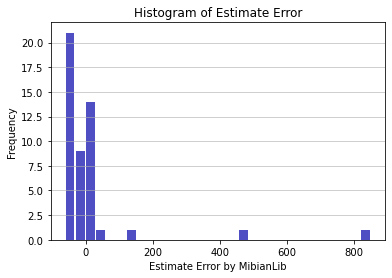

In [55]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')